Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

### Random Forest

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

In [3]:
#print the label species (setosa, versicolor, virginica)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
#print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#print the iris data (top 5 records)
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
#print the iris labels(0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#create a dataframe of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#import train_test_split function
from sklearn.model_selection import train_test_split

# features
x=data[['sepal length','sepal width','petal length','petal width']] 

#labels
y=data['species']

#split dataset into training and test set
#70% training set and 30% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)    

In [9]:
#import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#train the model using training set
clf.fit(x_train,y_train)

#predict the model using test set
y_pred=clf.predict(x_test)

c:\program files\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9555555555555556


In [11]:
clf.predict([[3,5,4,2]])

array([1])

In [12]:
#feature importance
feature_imp=pd.Series(clf.feature_importances_,
                     index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.498010
petal width (cm)     0.462949
sepal length (cm)    0.030223
sepal width (cm)     0.008819
dtype: float64

### Visualize the feature importance

No handles with labels found to put in legend.


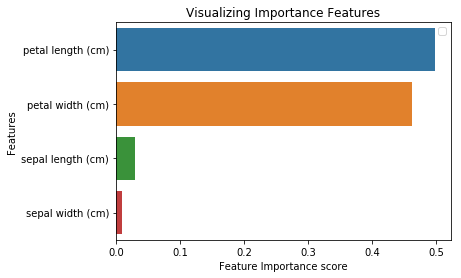

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create a bar plot
sns.barplot(x=feature_imp,y=feature_imp.index)

#add labels to the plot
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title("Visualizing Importance Features")
plt.legend()
plt.show()

### Re-generate the model with selected features

In [14]:
#Drop 'Sepal Width' since it has very low importance score
x=data[['petal length', 'petal width','sepal length']]

#labels
y=data['species']

#split dataset into training and test set
#70% training set and 30% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)  

In [15]:
#import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#estimate the training time
import time
start_time=time.time()
#train the model using training set
clf.fit(x_train,y_train)
print("%s seconds" % (time.time()-start_time))

#predict the model using test set
y_pred=clf.predict(x_test)

0.01800084114074707 seconds


In [16]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9555555555555556


### Decision Tree

In [17]:
#Drop 'Sepal Width' since it has very low importance score
x=data[['petal length', 'petal width','sepal length']]

#labels
y=data['species']

#split dataset into training and test set
#70% training set and 30% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)  

In [18]:
#import decision tree model
from sklearn.tree import DecisionTreeClassifier

#create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=0)

#estimate the training time
import time
start_time=time.time()
#train the model using training set
dtc.fit(x_train,y_train)
print("%s seconds" % (time.time()-start_time))

#predict the model using test set
y_pred=dtc.predict(x_test)


0.0009999275207519531 seconds


In [19]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9333333333333333
